# Lasso Regression Without Sklearn Packages

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
# Importing DataSet and take a look at Data
data = pd.read_csv("boston_train.csv")

In [3]:
# checking first five rows
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
#checking both no null values and columns dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
#checking for the outliers
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
#checking corrilation between numerical variables
data.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [7]:
#ID columns does not relevant for our analysis.
data.drop(['ID'], axis = 1, inplace=True)

## Asssigning independent variables and dependent variable to 'X' and 'y'

In [8]:
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']]
y = data['medv']

In [9]:
#Storing columns names
columns_X = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']
columns_y = ['medv']

In [10]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [11]:
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

## Creating " train_test_split " function to split the dataset

In [12]:
import random

def train_test_split(X, y, test_size=0.2, random_state=None):
    
    X=X.values
    # Set random seed
    if random_state:
        random.seed(random_state)

    # Determine number of test samples
    n_samples = len(X)
    n_test = int(test_size * n_samples)

    # Shuffle indices
    indices = list(range(n_samples))
    random.shuffle(indices)

    # Split indices into training and testing sets
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    # Split data into training and testing sets
    X_train = [X[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_train = [y[i] for i in train_indices]
    y_test = [y[i] for i in test_indices]

    return X_train, X_test, y_train, y_test


In [13]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


## Defining " StandardScaler " function to scale the data

In [14]:
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        X_scaled = ((X - self.mean) / self.std)
        return X_scaled
    
    def fit_transform(self, X):
        self.fit(X)
        X_scaled = self.transform(X)
        return X_scaled

In [15]:
x_test = X_test

In [16]:
# Scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Converting scaled data to DataFrame
X_train_scaled = pd.DataFrame(X_train,columns = columns_X)
X_test_scaled = pd.DataFrame(X_test,columns = columns_X)
y_train_s = pd.DataFrame(y_train,columns = columns_y)
y_test_s = pd.DataFrame(y_test,columns = columns_y)

In [18]:
X_train_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.409068,0.461073,-0.743356,-0.268866,-1.082013,0.263654,-1.966647,1.830619,-0.266148,-0.403498,0.319545,0.411127,-0.894929
1,-0.271793,-0.495770,1.535723,-0.268866,0.639096,0.035763,1.067527,-0.747264,-0.616205,0.227180,1.306700,0.418166,0.016422
2,-0.108293,-0.495770,1.207297,-0.268866,2.841759,-1.456145,0.934983,-1.016132,-0.499520,0.026778,-1.748781,-3.081662,0.572404
3,-0.385859,-0.495770,-0.168966,-0.268866,-0.074317,-0.547411,0.548099,0.121603,-0.616205,-0.556747,-0.009507,0.347777,0.886219
4,-0.376850,-0.495770,2.070305,-0.268866,0.255636,-0.973469,0.992299,-1.005671,-0.849577,-1.240474,0.319545,-0.008825,2.165837


In [19]:
X_test_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.420359,-0.495770,0.402581,-0.268866,-1.028507,0.351414,-0.605388,1.108256,-0.616205,-0.645160,-1.137685,0.372186,-0.681421
1,-0.417095,1.461409,-1.087422,-0.268866,-1.028507,0.681219,-0.960032,0.015987,-0.499520,-0.002693,-1.513744,0.383766,-0.783160
2,1.441891,-0.495770,0.996877,-0.268866,0.549919,-0.101538,0.720047,-0.908102,1.717508,1.576950,0.836626,0.263991,0.138223
3,-0.418735,-0.495770,-1.115857,-0.268866,-0.823401,-0.612523,-1.508118,0.733169,-0.616205,0.185921,-0.714618,0.254000,-0.311722
4,0.538176,-0.495770,0.996877,-0.268866,0.398319,-0.967807,1.074691,-1.157808,1.717508,1.576950,0.836626,-0.515742,2.042604


In [20]:
y_train_s

,medv
0,24.4
1,19.6
2,13.1
3,17.8
4,15.7
...,...
262,37.2
263,24.1
264,20.2
265,23.9


In [21]:
y_test_s

,medv
0,27.1
1,32.0
2,21.4
3,19.3
4,17.2
...,...
61,11.7
62,19.9
63,21.4
64,10.5


## Building the LassoRegression algorithm from skratch

In [22]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        self.intercept_ = np.mean(y)
        X_centered = X - np.mean(X, axis=0)
        for iteration in range(self.max_iter):
            old_theta = theta.copy()
            for j in range(n):
                X_j = X_centered[:, j]
                y_pred = X_centered.dot(theta) + self.intercept_
                r = y - y_pred + theta[j] * X_j
                z = X_j.dot(X_j)
                if z == 0:
                    theta[j] = 0
                else:
                    theta[j] = np.sign(np.sum(X_j*r)) * max(0, np.abs(np.sum(X_j*r)) - self.alpha) / z
            self.intercept_ = np.mean(y - X_centered.dot(theta))
            if np.sum(np.abs(theta - old_theta)) < self.tol:
                break
        self.coef_ = theta
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [23]:
# Fit the Lasso regression model
lasso = LassoRegression(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [24]:
y_pred.shape

(66,)

## Performence matrics

### R2_score

In [25]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [26]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", "{:.2f}".format(r2*100))

R-squared: 77.88


### Mean Squared Error

In [27]:
import numpy as np

def mean_squared_error(y_test, y_pred):
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", "{:.2f}".format(mse))


Mean squared error: 15.24


In [29]:
a = [[1,1,1,1,1,1,1,1,1,1,1,1,1]]
a= np.array(a)

In [30]:
lasso.predict(a)

array([18.68237643])

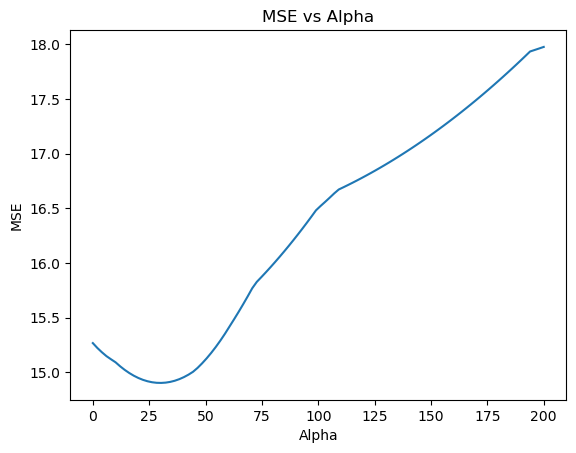

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to calculate MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define range of alpha values to test
alpha_values = np.linspace(0.01, 200, 100)

# Initialize lists to store MSE and coefficient values for each alpha
mse_values = []
coef_values = []

# Loop over alpha values and fit Lasso model
for alpha in alpha_values:
    lasso = LassoRegression(alpha=alpha)
    lasso.fit(X_train, y_train)
    mse_values.append(mse(y_test, lasso.predict(X_test)))
    coef_values.append(lasso.coef_)

# Plot MSE vs alpha
plt.plot(alpha_values, mse_values)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha')
plt.show()

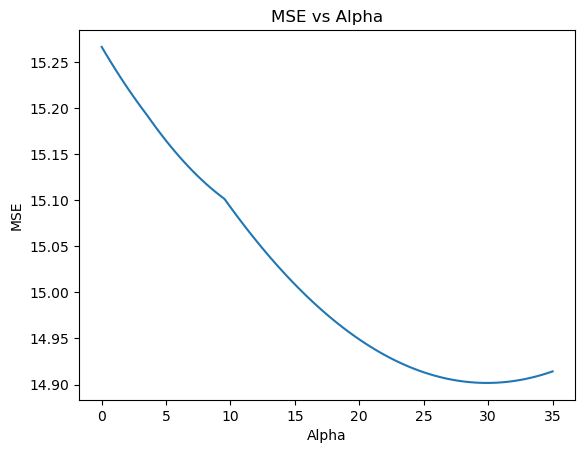

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to calculate MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define range of alpha values to test
alpha_values = np.linspace(0.01, 35, 100)

# Initialize lists to store MSE and coefficient values for each alpha
mse_values = []
coef_values = []

# Loop over alpha values and fit Lasso model
for alpha in alpha_values:
    lasso = LassoRegression(alpha=alpha)
    lasso.fit(X_train, y_train)
    mse_values.append(mse(y_test, lasso.predict(X_test)))
    coef_values.append(lasso.coef_)

# Plot MSE vs alpha
plt.plot(alpha_values, mse_values)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha')
plt.show()

In [33]:
# Fit the Lasso regression model
Lasso = LassoRegression(alpha=30)
Lasso.fit(X_train, y_train)

# Make predictions on the testing set
Y_pred = Lasso.predict(X_test)

In [34]:
Lasso.predict(a)

array([19.47399507])

In [35]:
r2 = r2_score(y_test, Y_pred)
print("R-squared:", "{:.2f}".format(r2*100))

R-squared: 78.38


In [36]:
MSE = mean_squared_error(y_test, Y_pred)
print("Mean squared error:", "{:.2f}".format(MSE))


Mean squared error: 14.90


# R2_score is 78.38

# The least Mean squared error is : 14.9

In [37]:
import pickle
# open a file, where you ant to store the data
file = open('lasso.pkl', 'wb')

# dump information to that file
pickle.dump(Lasso, file)
file.close()

In [38]:
data.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [39]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [40]:
data.to_csv("data.csv",index=False)

# Conclusion
## Lasso Regression has given the best R2_score : 78.38
## And best MSE : 14.90

#### ****

# ****** 

## Performance matrics

## Lasso_Regression

In [41]:
print("R-squared for lasso:", "{:.2f}".format(r2*100))
print("Mean squared error for lasso:", "{:.2f}".format(MSE))


R-squared for lasso: 78.38
Mean squared error for lasso: 14.90


In [42]:
import pickle
# open a file, where you ant to store the data
scale = open('scaler.pkl', 'wb')

# dump information to that file
pickle.dump(scaler, scale)
scale.close()

In [43]:
scale = open("scaler.pkl","rb")
scaler=pickle.load(scale)

In [44]:
X_test = scaler.transform(X_test)

In [45]:
data.shape

(333, 14)

In [46]:
x_test = data.iloc[227:]

In [47]:
x_test.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
227,0.02498,0.0,1.89,0,0.518,6.54,59.7,6.2669,1,422,15.9,389.96,8.65,16.5


#####    Reddappa M R